### Importação das bibliotecas e base de dados
Importa a biblioteca pandas, carrega a base de dados CSV a partir do Google Drive e exibe as primeiras 5 linhas da tabela para visualização.

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer

data = pd.read_csv('dataset_tratado.csv')

pd.set_option('display.max_columns', None)

print(f'Dimensões: {data.shape}')
print(f'Colunas: {data.columns}')

data.head(5)

Dimensões: (3713, 24)
Colunas: Index(['Idade', 'Gênero', 'Cor/Raça', 'Horas com trabalho doméstico e cuidado',
       'PCD', 'Estado onde mora', 'Região onde mora', 'Roubos de veículo',
       'Roubos de carro', 'Roubos de moto', 'Roubos de bicicleta',
       'Roubos fora do domicílio', 'Total de roubos', 'Nivel de segurança',
       'Nível de ensino', 'Área de formação', 'Situação atual de trabalho',
       'Cargo atual', 'Nível', 'Faixa salarial', 'Tempo de experiência',
       'Forma de trabalho atual',
       'Decisão da empresa para modelo 100% presencial',
       'Forma de trabalho ideal'],
      dtype='object')


Idade     Gênero Cor/Raça  Horas com trabalho doméstico e cuidado  PCD  \
0     31  Masculino   Branca                                    16.5  Não   
1     30  Masculino   Branca                                    16.5  Não   
2     37   Feminino  Amarela                                    17.0  Não   
3     34  Masculino   Branca                                    16.5  Não   
4     30  Masculino   Branca                                    16.5  Não   

      Estado onde mora Região onde mora  Roubos de veículo  Roubos de carro  \
0    Minas Gerais (MG)          Sudeste               92.0             67.0   
1  Espírito Santo (ES)          Sudeste               92.0             67.0   
2       São Paulo (SP)          Sudeste               92.0             67.0   
3    Minas Gerais (MG)          Sudeste               92.0             67.0   
4  Rio de Janeiro (RJ)          Sudeste               92.0             67.0   

   Roubos de moto  Roubos de bicicleta  Roubos fora do domicílio  \
0            25.0                 23.0                     565.0   
1            25.0                 23.0                     565.0   
2            25.0                 23.0                     565.0   
3            25.0                 23.0                     565.0   
4            25.0                 23.0                     565.0   

   Total de roubos Nivel de segurança         Nível de ensino  \
0            749.0           Moderado        Doutorado ou Phd   
1            749.0           Moderado   Graduação/Bacharelado   
2            749.0           Moderado   Graduação/Bacharelado   
3            749.0           Moderado        Doutorado ou Phd   
4            749.0           Moderado  Estudante de Graduação   

                                    Área de formação  \
0  Computação / Engenharia de Software / Sistemas...   
1  Computação / Engenharia de Software / Sistemas...   
2  Computação / Engenharia de Software / Sistemas...   
3  Economia/ Administração / Contabilidade / Fina...   
4  Computação / Engenharia de Software / Sistemas...   

         Situação atual de trabalho  \
0                   Empregado (CLT)   
1  Empreendedor ou Empregado (CNPJ)   
2                   Empregado (CLT)   
3  Empreendedor ou Empregado (CNPJ)   
4  Empreendedor ou Empregado (CNPJ)   

                                         Cargo atual   Nível  \
0                  Cientista de Dados/Data Scientist  Sênior   
1                          Analista de BI/BI Analyst   Pleno   
2                     Analista de Dados/Data Analyst  Júnior   
3                     Analista de Dados/Data Analyst  Júnior   
4  Engenheiro de Dados/Arquiteto de Dados/Data En...   Pleno   

                     Faixa salarial Tempo de experiência  \
0  de R$ 12.001/mês a R$ 16.000/mês        de 3 a 4 anos   
1    de R$ 6.001/mês a R$ 8.000/mês        de 3 a 4 anos   
2    de R$ 6.001/mês a R$ 8.000/mês        de 1 a 2 anos   
3    de R$ 4.001/mês a R$ 6.000/mês       Menos de 1 ano   
4   de R$ 8.001/mês a R$ 12.000/mês        de 1 a 2 anos   

  Forma de trabalho atual     Decisão da empresa para modelo 100% presencial  \
0          Modelo híbrido  Vou procurar outra oportunidade no modelo 100%...   
1      Modelo 100% remoto  Vou procurar outra oportunidade no modelo híbr...   
2          Modelo híbrido   Vou aceitar e retornar ao modelo 100% presencial   
3      Modelo 100% remoto  Vou procurar outra oportunidade no modelo híbr...   
4      Modelo 100% remoto  Vou procurar outra oportunidade no modelo 100%...   

  Forma de trabalho ideal  
0      Modelo 100% remoto  
1      Modelo 100% remoto  
2      Modelo 100% remoto  
3      Modelo 100% remoto  
4      Modelo 100% remoto

### Gerando base de treinamento e teste
Seleciona os dados de teste e o alvo e codifica os valores categóricos para numéricos e divide a base de dados em treino (70%) e teste (30%)

In [23]:
X_dict = data.drop(columns=['Roubos de veículo',	'Roubos de carro',	'Roubos de moto', 'Roubos de bicicleta',	'Roubos fora do domicílio',	'Total de roubos', 'Forma de trabalho ideal'], axis=1).T.to_dict().values()
vect = DictVectorizer(sparse=False)
X = vect.fit_transform(X_dict)

le = LabelEncoder()
y = le.fit_transform(data.iloc[:, data.shape[1]-1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Treinando o Random Forest
Treina o RandomForest e guarda todas as acurácias em um array, foi separado duas árvores para fins de comparação. Uma com melhor desempenho de acurácia e outra com o pior desempenho

In [24]:
forest = RandomForestClassifier(random_state=42, criterion='entropy', max_depth=7)
forest.fit(X_train, y_train)
print(f'Acurácia do treinamento: {forest.score(X_train, y_train)}')

accuracies = {}

for i, tree_model in enumerate(forest.estimators_):
  y_pred = tree_model.predict(X_test)
  acc_score = accuracy_score(y_test, y_pred)
  accuracies[i] = acc_score

best_tree = max(accuracies, key=accuracies.get)
worst_tree = min(accuracies, key=accuracies.get)

print(f'Acurácia da melhor árvore: {accuracies[best_tree]}')
print(f'Acurácia da pior árvore: {accuracies[worst_tree]}')

best_y_pred = forest.estimators_[best_tree].predict(X_test)
worst_y_pred = forest.estimators_[worst_tree].predict(X_test)

print('\nClassification Report da melhor árvore:')
print(classification_report(y_test, best_y_pred))
print('\nClassification Report da pior árvore:')
print(classification_report(y_test, worst_y_pred))

Acurácia do treinamento: 0.8260869565217391
Acurácia da melhor árvore: 0.7630161579892281
Acurácia da pior árvore: 0.5915619389587073

Classification Report da melhor árvore:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.82      0.68      0.74       524
           2       0.73      0.87      0.79       571

    accuracy                           0.76      1114
   macro avg       0.52      0.51      0.51      1114
weighted avg       0.76      0.76      0.76      1114


Classification Report da pior árvore:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.59      0.55      0.57       524
           2       0.60      0.65      0.62       571

    accuracy                           0.59      1114
   macro avg       0.40      0.40      0.40      1114
weighted avg       0.58      0.59      0.59      1114



### Matriz de confusão da melhor árvore
Aqui foi feita a visualização da matriz de confusão da árvore com melhor desempenho, sendo mostrado uma pequena confusão entre remoto e hibrído. O modelo presencial foi completamente desconsiderado em função de ter poucos dados relacionados a esse modelo

Matriz de confusão: 
[[  0   1  18]
 [  2 356 166]
 [  1  76 494]]
Matriz de confusão formatada: 
                        Modelo 100% presencial  Modelo 100% remoto  \
Modelo 100% presencial                       0                   1   
Modelo 100% remoto                           2                 356   
Modelo híbrido                               1                  76   

                        Modelo híbrido  
Modelo 100% presencial              18  
Modelo 100% remoto                 166  
Modelo híbrido                     494  


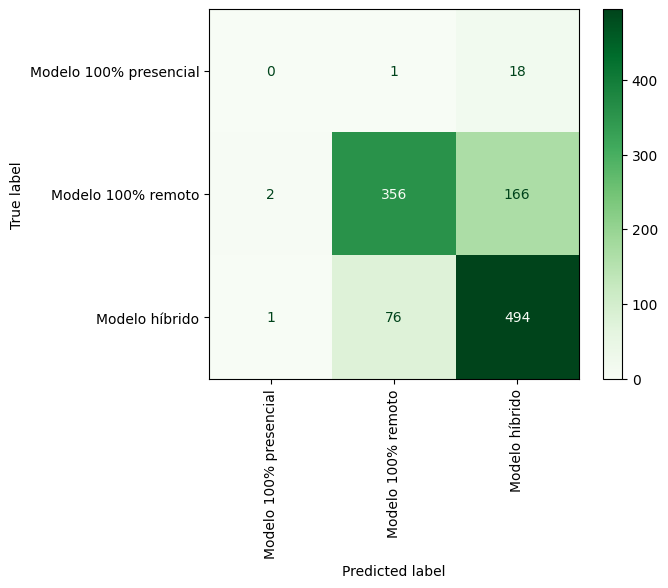

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

# Melhor arvore
best_cnf_matrix = confusion_matrix(y_test, best_y_pred)
print(f'Matriz de confusão: \n{best_cnf_matrix}')

df_cnf_matrix = pd.DataFrame(best_cnf_matrix, index=le.classes_, columns=le.classes_)
print(f'Matriz de confusão formatada: \n{df_cnf_matrix}')

display = ConfusionMatrixDisplay.from_estimator(forest.estimators_[best_tree], X_test, y_test, display_labels=le.classes_, cmap=plt.cm.Greens)

plt.xticks(rotation=90)
plt.show()

### Matriz de confusão da pior árvore
Enquanto aqui, é descrito a matriz de confusão da da árvore com menor desempenho. Aqui a confusão entre hibrido e remoto é mais generalizada

Matriz de confusão: 
[[  0   1  18]
 [  2 356 166]
 [  1  76 494]]
Matriz de confusão formatada: 
                        Modelo 100% presencial  Modelo 100% remoto  \
Modelo 100% presencial                       0                   1   
Modelo 100% remoto                           1                 290   
Modelo híbrido                               4                 198   

                        Modelo híbrido  
Modelo 100% presencial              18  
Modelo 100% remoto                 233  
Modelo híbrido                     369  


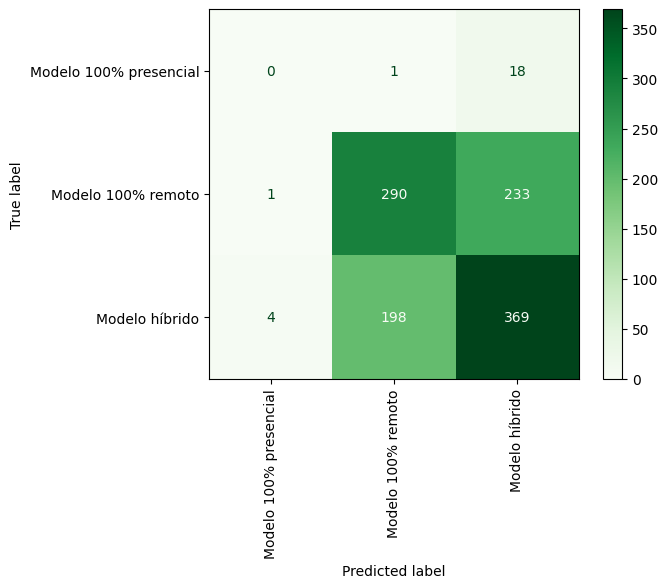

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

# Melhor arvore
worst_cnf_matrix = confusion_matrix(y_test, worst_y_pred)
print(f'Matriz de confusão: \n{best_cnf_matrix}')

df_cnf_matrix = pd.DataFrame(worst_cnf_matrix, index=le.classes_, columns=le.classes_)
print(f'Matriz de confusão formatada: \n{df_cnf_matrix}')

display = ConfusionMatrixDisplay.from_estimator(forest.estimators_[worst_tree], X_test, y_test, display_labels=le.classes_, cmap=plt.cm.Greens)

plt.xticks(rotation=90)
plt.show()

### Visualização de um gráfico de importância da melhor árvore
Foi feito uma vizualização dos valores mais importantes na construção da melhor árvore. Os atributos mais importantes levam em consideração a forma de trabalho atual do profissional e a atitude do profissional caso a empresa adote o modelo 100% presencial

Importância das variáveis: 
Decisão da empresa para modelo 100% presencial=Vou aceitar e retornar ao modelo 100% presencial               0.311739
Forma de trabalho atual=Modelo híbrido                                                                        0.212135
Decisão da empresa para modelo 100% presencial=Vou procurar outra oportunidade no modelo híbrido ou remoto    0.096771
Decisão da empresa para modelo 100% presencial=Vou procurar outra oportunidade no modelo 100% remoto          0.085514
Forma de trabalho atual=Modelo 100% remoto                                                                    0.064423
Área de formação=Outra opção                                                                                  0.014356
Faixa salarial=de R$ 4.001/mês a R$ 6.000/mês                                                                 0.013847
Nível=Sênior                                                                                                  0.011894
Estado onde mora=Rio

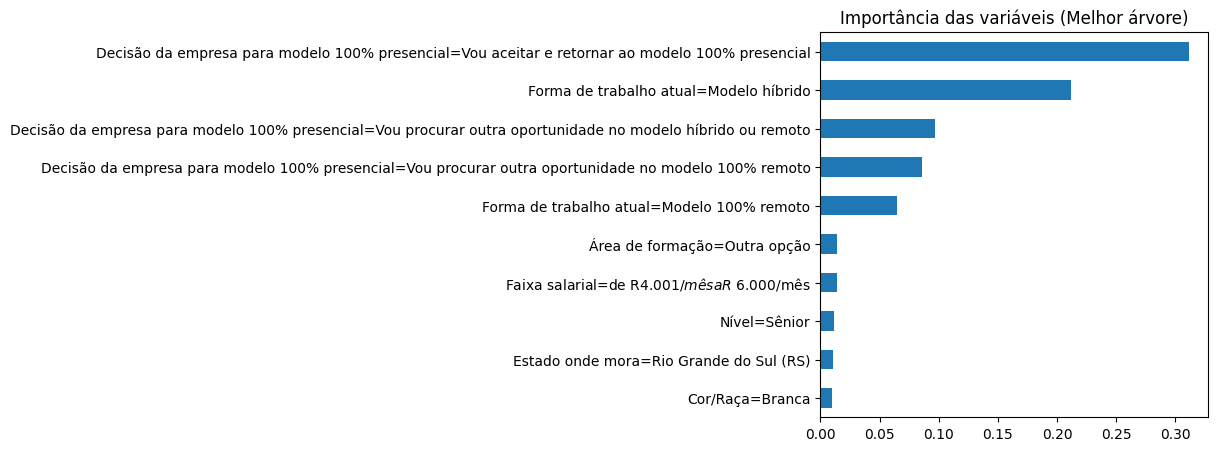

In [27]:
best_importance = forest.estimators_[best_tree].feature_importances_

best_importance_series = pd.Series(best_importance, index=vect.get_feature_names_out())
best_importance_series = best_importance_series.sort_values(ascending=False).head(10)

print(f'Importância das variáveis: \n{best_importance_series}')

plt.figure(figsize=(5, 5))
best_importance_series.plot(kind='barh', legend=False)
plt.title('Importância das variáveis (Melhor árvore)')
plt.gca().invert_yaxis()

### Visualização do gráfico de importância da pior árvore
Entretanto, aqui a visualização dos atributos mais importantes deu mais ênfase em aspectos demográficos do que a atitude do profissional em caso da empresa adotar 100% presencial e o modelo de trabalho atual


Importância das variáveis: 
Decisão da empresa para modelo 100% presencial=Vou aceitar e retornar ao modelo 100% presencial    0.352205
Forma de trabalho atual=Modelo 100% remoto                                                         0.093790
Região onde mora=Nordeste                                                                          0.044124
Faixa salarial=de R$ 6.001/mês a R$ 8.000/mês                                                      0.035272
Cargo atual=Analista de Dados/Data Analyst                                                         0.027648
Forma de trabalho atual=Modelo 100% presencial                                                     0.027511
Gênero=Masculino                                                                                   0.023162
Idade                                                                                              0.023008
Faixa salarial=de R$ 20.001/mês a R$ 25.000/mês                                                    0.022522

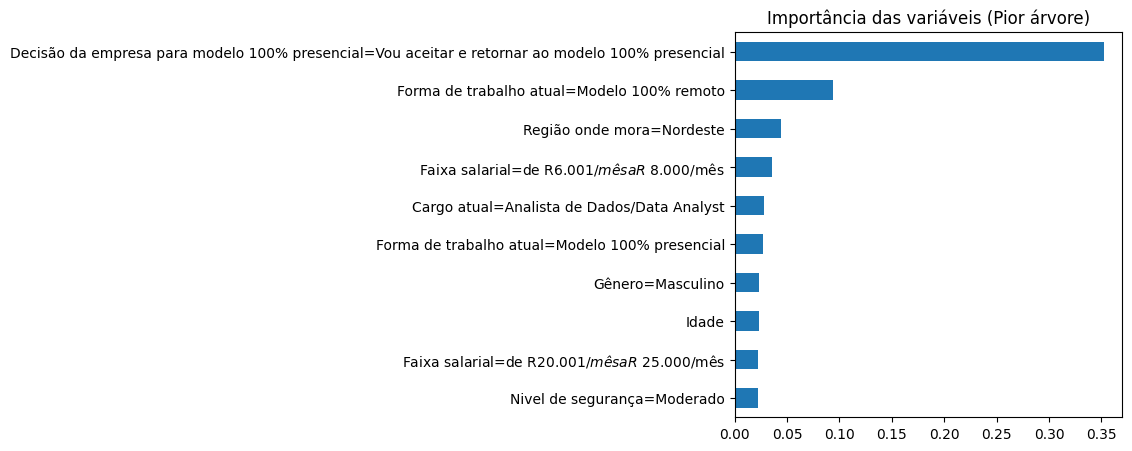

In [28]:
worst_importance = forest.estimators_[worst_tree].feature_importances_

worst_importance_series = pd.Series(worst_importance, index=vect.get_feature_names_out())
worst_importance_series = worst_importance_series.sort_values(ascending=False).head(10)

print(f'\nImportância das variáveis: \n{worst_importance_series}')

plt.figure(figsize=(5, 5))
worst_importance_series.plot(kind='barh', legend=False)
plt.title('Importância das variáveis (Pior árvore)')
plt.gca().invert_yaxis()

### Visualização do RandomForest
Uma vizualização de todas as 100 árvores com suas respectivas acurácias

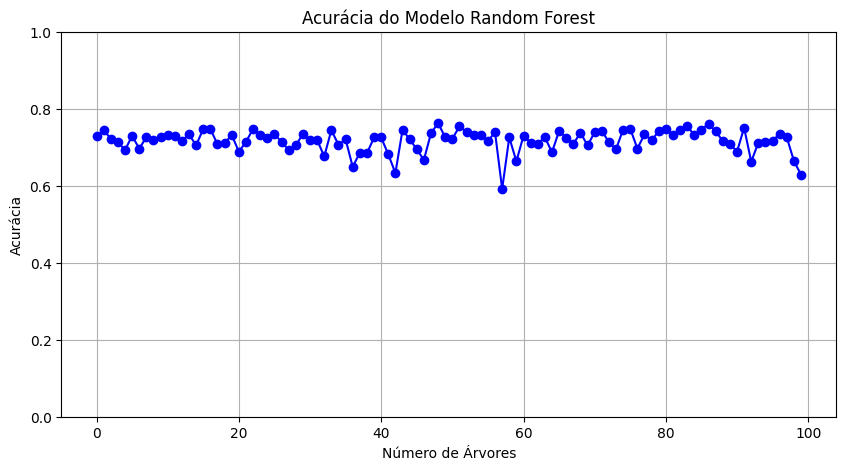

In [29]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.plot(range(len(accuracies.items())), accuracies.values(), marker='o', linestyle='-', color='blue')
plt.title('Acurácia do Modelo Random Forest')
plt.xlabel('Número de Árvores')
plt.ylabel('Acurácia')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

### Visualização da Árvore com melhor desempenho
Gerado uma visualização da melhor árvore, que foi limitada um max_depth=5

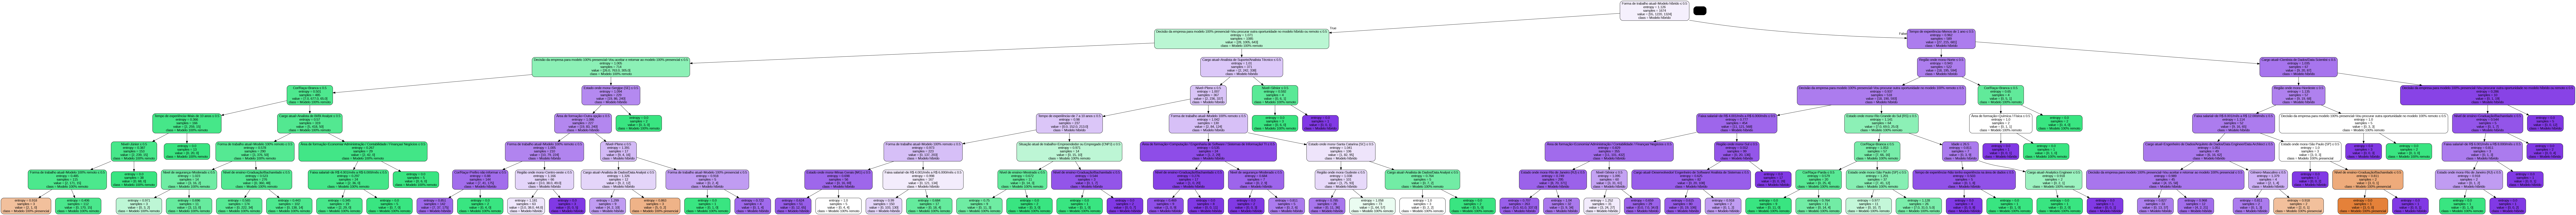

In [30]:
import pydotplus
from sklearn import tree
from IPython.display import Image

dot_data = tree.export_graphviz(forest.estimators_[best_tree], out_file=None, feature_names=vect.get_feature_names_out(), class_names=le.classes_, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Visualização da Árvore com melhor desempenho
Gerado uma visualização da pior árvore, que foi limitada um max_depth=5

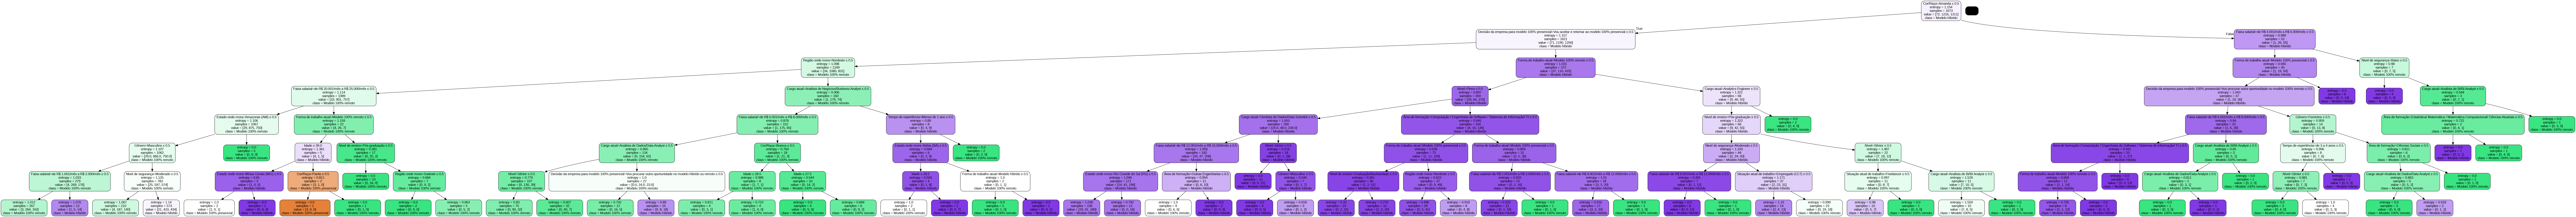

In [31]:
import pydotplus
from sklearn import tree
from IPython.display import Image

dot_data = tree.export_graphviz(forest.estimators_[worst_tree], out_file=None, feature_names=vect.get_feature_names_out(), class_names=le.classes_, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())